In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,f1_score,roc_auc_score,accuracy_score,precision_score,confusion_matrix

In [41]:
df=pd.read_csv(r"C:\Users\Avantika\seeds_dataset.csv")

In [42]:
df

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [43]:
column_names=['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','class']
df1=pd.read_csv(r"C:\Users\Avantika\seeds_dataset.csv",header=None,names=column_names)

In [44]:
df1

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [45]:
df1.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [47]:
df1.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

In [48]:
df1.shape

(210, 8)

In [49]:
X=df1.iloc[:,0:7]
X

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [50]:
Y=df1.iloc[:,7:8]
Y

,class
0,1
1,1
2,1
3,1
4,1
...,...
205,3
206,3
207,3
208,3


In [51]:
df1.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [52]:
df1.shape

(210, 8)

In [53]:
std_s=StandardScaler()
std_s
X_scaled=std_s.fit_transform(X)

In [54]:
X_scaled.shape

(210, 7)

In [55]:
Y.shape

(210, 1)

In [56]:
#splitting the data for training and testing 80% for training and 20% for testing
X_scaled_train,X_scaled_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.8)

In [57]:
X_scaled_train.shape

(168, 7)

In [58]:
X_scaled_test.shape

(42, 7)

In [59]:
Y_train.shape

(168, 1)

In [60]:
Y_test.shape

(42, 1)

In [61]:
knnmodel=KNeighborsClassifier(n_neighbors=5)
knnmodel

KNeighborsClassifier()

In [62]:
knnmodel.fit(X_scaled_train,Y_train)

C:\Users\Avantika\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
Y_predict=knnmodel.predict(X_scaled_test)
Y_predict

array([3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 3, 2, 2, 3,
       1, 3, 3, 3, 1, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 2],
      dtype=int64)

In [64]:
#calculating the mean square error 
mean_sq_er=mean_squared_error(Y_test,Y_predict)
mean_sq_er

0.3333333333333333

In [65]:
accuracy=accuracy_score(Y_test,Y_predict)
accuracy

0.8809523809523809

In [66]:
precision=precision_score(Y_test,Y_predict,average='weighted')
precision

0.8895502645502646

In [67]:
recall=recall_score(Y_test,Y_predict,average='weighted')
recall

0.8809523809523809

In [68]:
f1=f1_score(Y_test,Y_predict,average='weighted')
f1

0.8827292790025709

In [69]:
print(f'Mean Squared Error is :{mean_sq_er} \nAccuracy Score is : {accuracy*100} % \nRecall Score is : {recall*100} % \nPrecision Score is : {precision*100} % \nF1 score is : {f1*100} %')

Mean Squared Error is :0.3333333333333333 
Accuracy Score is : 88.09523809523809 % 
Recall Score is : 88.09523809523809 % 
Precision Score is : 88.95502645502647 % 
F1 score is : 88.27292790025709 %


In [70]:
conf_matrix=confusion_matrix(Y_test,Y_predict)
conf_matrix


array([[ 9,  0,  2],
       [ 2, 12,  0],
       [ 1,  0, 16]], dtype=int64)

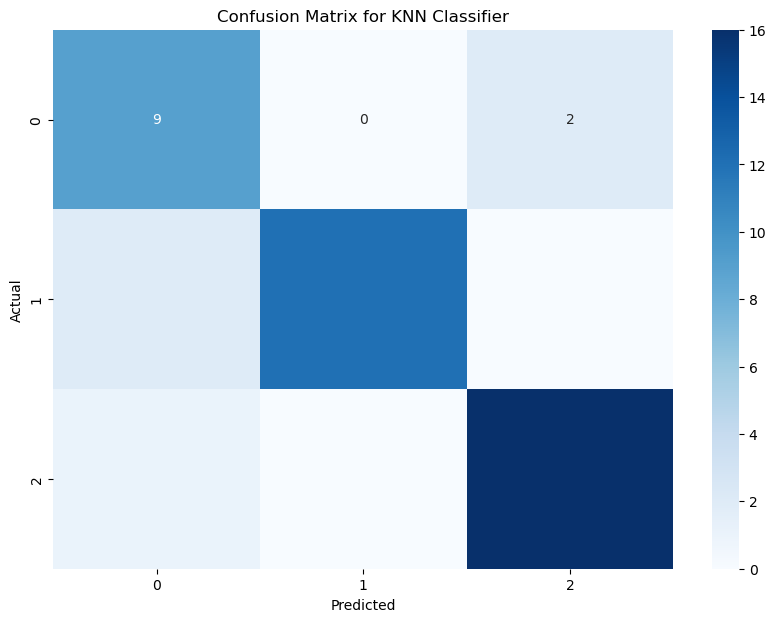

In [71]:
#visualization of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()